##### THE FOLLOWING STEPS ARE FOLLOWED:

### 1. VIEW MHEALTH DATASET

### 2. DATA PREPROCESSING

### 3. FEATURE SELECTION

### 4. TRAINING WITH FEATURE SELECTION USING  SUPERVISED LEARNING ALGORITHMS

### 5. CONFUSION MATRIX .

In [38]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from pandas import DataFrame
#import random

#from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


### 1. VIEW MHEALTH DATASET

In [39]:
#Read in the dataset
df1 = pd.read_csv('C:/datasets/mHealth.csv', encoding = 'latin1')
#Latin 1 encoding is to interpret special character, to read in the file without producing error
df1

,MID,DAY,SEX,AGE,GEN,PRE,ARE,JOB,MAR,CHI,...,q4s7,q4s8,q4s9,q4s10,q4s11,q4s12,q4s13,q4s14,q4s15,q5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.000003e+09,6/8/2022 20:58,2.0,56.0,6.0,14.0,3.0,8.0,2.0,1.0,...,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000004e+09,6/8/2022 22:17,1.0,64.0,7.0,13.0,3.0,6.0,2.0,1.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1.010023e+09,6/8/2022 19:31,2.0,42.0,5.0,23.0,4.0,9.0,1.0,2.0,...,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,5.0,3.0
1678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1679,1.010023e+09,6/8/2022 19:20,2.0,48.0,5.0,3.0,2.0,3.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0
1680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df2 = df1.drop("q3t6", axis=1)#Drop"q3t6" column from the dataframe
print (df2.count())#Returns the number of non null values in each data frame column

MID      841
DAY      841
SEX      841
AGE      841
GEN      841
PRE      841
ARE      841
JOB      841
MAR      841
CHI      841
q1t1     413
q2c1     841
q2c2     841
q2c3     841
q2c4     841
q3       632
q4s1     632
q4s2     632
q4s3     632
q4s4     632
q4s5     632
q4s6     632
q4s7     632
q4s8     632
q4s9     632
q4s10    632
q4s11    632
q4s12    632
q4s13    632
q4s14    632
q4s15    632
q5       632
dtype: int64


In [41]:
df2.head() #Display the first five rows in the dataset

,MID,DAY,SEX,AGE,GEN,PRE,ARE,JOB,MAR,CHI,...,q4s7,q4s8,q4s9,q4s10,q4s11,q4s12,q4s13,q4s14,q4s15,q5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.000003e+09,6/8/2022 20:58,2.0,56.0,6.0,14.0,3.0,8.0,2.0,1.0,...,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000004e+09,6/8/2022 22:17,1.0,64.0,7.0,13.0,3.0,6.0,2.0,1.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df2 = df2.drop_duplicates()

In [43]:
df= df2.dropna()
df

,MID,DAY,SEX,AGE,GEN,PRE,ARE,JOB,MAR,CHI,...,q4s7,q4s8,q4s9,q4s10,q4s11,q4s12,q4s13,q4s14,q4s15,q5
1,1.000003e+09,6/8/2022 20:58,2.0,56.0,6.0,14.0,3.0,8.0,2.0,1.0,...,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0
7,1.000004e+09,6/8/2022 19:30,2.0,54.0,6.0,13.0,3.0,9.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0
15,1.000009e+09,6/8/2022 20:08,2.0,60.0,7.0,27.0,5.0,4.0,1.0,2.0,...,3.0,2.0,2.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0
19,1.000009e+09,6/8/2022 19:15,2.0,60.0,7.0,23.0,4.0,6.0,2.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0
25,1.000014e+09,6/8/2022 19:53,2.0,65.0,7.0,14.0,3.0,8.0,2.0,1.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,1.009988e+09,6/8/2022 21:20,2.0,32.0,4.0,4.0,2.0,7.0,1.0,2.0,...,3.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0
1661,1.009995e+09,6/8/2022 21:59,1.0,24.0,3.0,8.0,3.0,9.0,1.0,2.0,...,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0
1665,1.010001e+09,6/8/2022 19:13,2.0,46.0,5.0,14.0,3.0,8.0,1.0,1.0,...,3.0,3.0,3.0,3.0,2.0,1.0,3.0,2.0,2.0,3.0
1679,1.010023e+09,6/8/2022 19:20,2.0,48.0,5.0,3.0,2.0,3.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0


In [44]:
#view columns
df.columns

Index(['MID', 'DAY', 'SEX', 'AGE', 'GEN', 'PRE', 'ARE', 'JOB', 'MAR', 'CHI',
       'q1t1', 'q2c1', 'q2c2', 'q2c3', 'q2c4', 'q3', 'q4s1', 'q4s2', 'q4s3',
       'q4s4', 'q4s5', 'q4s6', 'q4s7', 'q4s8', 'q4s9', 'q4s10', 'q4s11',
       'q4s12', 'q4s13', 'q4s14', 'q4s15', 'q5'],
      dtype='object')

In [45]:
#total amount of rows and colunms

total_rows=len(df.axes[0])

print("total rows", total_rows )


total_cols=len(df.axes[1])

print("total columns", total_cols )

total rows 368
total columns 32


#### NOTE: Rating column is the target column for prediction

#### So lets view the Rating column only

In [46]:
#### View Overall star rating column 
df['q4s14'].value_counts()

2.0    158
3.0    143
1.0     32
4.0     24
5.0     11
Name: q4s14, dtype: int64

### 2. DATA PREPROCESSING : We will perform data discretization or encoding and Normalise using MInmax.

#### Firstly we check dataset for any categorical or object columns

In [47]:
#check datatypes
df.dtypes

MID      float64
DAY       object
SEX      float64
AGE      float64
GEN      float64
PRE      float64
ARE      float64
JOB      float64
MAR      float64
CHI      float64
q1t1      object
q2c1     float64
q2c2     float64
q2c3     float64
q2c4     float64
q3       float64
q4s1     float64
q4s2     float64
q4s3     float64
q4s4     float64
q4s5     float64
q4s6     float64
q4s7     float64
q4s8     float64
q4s9     float64
q4s10    float64
q4s11    float64
q4s12    float64
q4s13    float64
q4s14    float64
q4s15    float64
q5       float64
dtype: object

#### From output above we see that Day and q1t1  columns are object.
#### so we need to encode them to numeric values this is where data discretization is done.

In [48]:
#newtarg  =df.q4s14.map(lambda a: 0 if a == '4.0' or a == '5.0' else 1)
# map rating column value 4 and 5 to 0, all other to 1
# this means good performance = 0 ,
#poor performance =1, 
re3  = df["q4s14"].replace({1.0:"STRONGLY AGREE", 2.0: "AGREE",3.0: "NOT DECIDED",4.0: "DISAGREE",5.0: "STRONGLY DISAGREE"}, inplace=True)

C:\Users\user2222\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [50]:
df['q4s14'].value_counts()

AGREE                158
NOT DECIDED          143
STRONGLY AGREE        32
DISAGREE              24
STRONGLY DISAGREE     11
Name: q4s14, dtype: int64

### Data Encoding or Discretization using pd.get_dummies

In [51]:
dfencoddata= pd.get_dummies(df)
#dfencoddata
print (np.shape(dfencoddata))
print (dfencoddata.columns)
#view first five rows
dfencoddata[:5]

(368, 328)
Index(['MID', 'SEX', 'AGE', 'GEN', 'PRE', 'ARE', 'JOB', 'MAR', 'CHI', 'q2c1',
       ...
       'q1t1_pokean', 'q1t1_sanarawayanata', 'q1t1_scale up',
       'q1t1_withwellness', 'q1t1_y mobile', 'q4s14_AGREE', 'q4s14_DISAGREE',
       'q4s14_NOT DECIDED', 'q4s14_STRONGLY AGREE', 'q4s14_STRONGLY DISAGREE'],
      dtype='object', length=328)


,MID,SEX,AGE,GEN,PRE,ARE,JOB,MAR,CHI,q2c1,...,q1t1_pokean,q1t1_sanarawayanata,q1t1_scale up,q1t1_withwellness,q1t1_y mobile,q4s14_AGREE,q4s14_DISAGREE,q4s14_NOT DECIDED,q4s14_STRONGLY AGREE,q4s14_STRONGLY DISAGREE
1,1.000003e+09,2.0,56.0,6.0,14.0,3.0,8.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
7,1.000004e+09,2.0,54.0,6.0,13.0,3.0,9.0,2.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
15,1.000009e+09,2.0,60.0,7.0,27.0,5.0,4.0,1.0,2.0,1.0,...,0,0,0,0,0,0,0,1,0,0
19,1.000009e+09,2.0,60.0,7.0,23.0,4.0,6.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
25,1.000014e+09,2.0,65.0,7.0,14.0,3.0,8.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0


#### From output above, data encoding has been done on Day and q1t1  columns.


### NORMALISE DATA: using MinMax : For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

In [53]:
#### Normalize data
from sklearn.preprocessing import MinMaxScaler

#normalize before dropping the target columns in other to use for correlation feature selection
scaler = MinMaxScaler() 
s_for_correlation= scaler.fit_transform(dfencoddata)

#convert back to dataframe
s_for_correlation2 = pd.DataFrame(s_for_correlation, columns=dfencoddata.columns,index=df.index)



#normalise while dropping target columns and encode the rest of the data in other to use for other feature selection
drpped= df.drop(['q4s14'],axis=1)
dfencoded= pd.get_dummies(drpped)


scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(dfencoded)

print (np.shape(scaled_values))


#convert back to dataframe
scaled_values_to_df = pd.DataFrame(scaled_values, columns=dfencoded.columns,index=df.index)

#show first five rows of normalised data

scaled_values_to_df.head()

(368, 323)


,MID,SEX,AGE,GEN,PRE,ARE,JOB,MAR,CHI,q2c1,...,q1t1_miles,q1t1_nai,q1t1_nsi,q1t1_omron connect,q1t1_omuron connect,q1t1_pokean,q1t1_sanarawayanata,q1t1_scale up,q1t1_withwellness,q1t1_y mobile
1,0.000000,1.0,0.622951,0.8,0.282609,0.285714,0.7,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000154,1.0,0.590164,0.8,0.260870,0.285714,0.8,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.000596,1.0,0.688525,1.0,0.565217,0.571429,0.3,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.000673,1.0,0.688525,1.0,0.478261,0.428571,0.5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.001139,1.0,0.770492,1.0,0.282609,0.285714,0.7,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### From output above the dataset have been normalised to values between 0s and 1s

### 3. FEATURE SELECTION

#### Lasso

In [54]:
#using lasso
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

X= scaled_values_to_df  #Feature Matrix
y = df["q4s14"] #target
scaler = StandardScaler()
scaler.fit(X)
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(scaler.transform(X.fillna(0)), y)

lasso_for_training=sel_.fit_transform(X.fillna(0), y)


#print (np.shape(lasso_for_training))

sel_support = sel_.get_support()

#print(sel_support)

selected_feat = X.columns[(sel_.get_support())]


print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

print(selected_feat)

print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

C:\Users\user2222\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user2222\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


total features: 323
selected features: 75
Index(['MID', 'SEX', 'GEN', 'PRE', 'JOB', 'MAR', 'CHI', 'q2c1', 'q2c2', 'q2c3',
       'q3', 'q4s1', 'q4s2', 'q4s3', 'q4s4', 'q4s5', 'q4s6', 'q4s7', 'q4s8',
       'q4s9', 'q4s10', 'q4s11', 'q4s12', 'q4s13', 'q4s15', 'q5',
       'DAY_6/8/2022 19:01', 'DAY_6/8/2022 19:04', 'DAY_6/8/2022 19:05',
       'DAY_6/8/2022 19:06', 'DAY_6/8/2022 19:07', 'DAY_6/8/2022 19:08',
       'DAY_6/8/2022 19:09', 'DAY_6/8/2022 19:10', 'DAY_6/8/2022 19:13',
       'DAY_6/8/2022 19:16', 'DAY_6/8/2022 19:20', 'DAY_6/8/2022 19:21',
       'DAY_6/8/2022 19:23', 'DAY_6/8/2022 19:24', 'DAY_6/8/2022 19:26',
       'DAY_6/8/2022 19:29', 'DAY_6/8/2022 19:30', 'DAY_6/8/2022 19:32',
       'DAY_6/8/2022 19:34', 'DAY_6/8/2022 19:37', 'DAY_6/8/2022 19:43',
       'DAY_6/8/2022 19:44', 'DAY_6/8/2022 19:49', 'DAY_6/8/2022 20:08',
       'DAY_6/8/2022 20:12', 'DAY_6/8/2022 20:28', 'DAY_6/8/2022 20:35',
       'DAY_6/8/2022 20:45', 'DAY_6/8/2022 20:46', 'DAY_6/8/2022 20:48',
     

### 4.   TRAINING WITH FEATURE SELECTION METHOD USING SUPERVISED LEARNING ALGORITHMS

In [55]:
#Using lasso

X=lasso_for_training

print (np.shape(X))

y = df['q4s14']

print (np.shape(y))

(368, 75)
(368,)


#### build the training and testing sets (80% For training, 20% for testing)

In [56]:
# build the training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Gausian Naive Bayes

In [57]:
#using gausian Naive Bayes with chisquare feature selection
from sklearn.naive_bayes import GaussianNB
binary_model =  GaussianNB()
binary_model.fit(X_train, y_train)
binary_predictions = binary_model.predict(X_test)

train_acc = binary_model.score(X_train, y_train) # mean acc on train data
# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,y_test)
base_rf_score

print("Training accuracy of Gaussian naive bayes for lasso (embedded method) Feature selection is:", train_acc )
print("Testing accuracy of Gaussian naive bayes for lasso (embedded method) Feature selection is:", base_rf_score)

Training accuracy of Gaussian naive bayes for lasso (embedded method) Feature selection is: 0.43197278911564624
Testing accuracy of Gaussian naive bayes for lasso (embedded method) Feature selection is: 0.32432432432432434


#### Logistic Regression

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
binary_predictions = logmodel.predict(X_test)

train_acc = logmodel.score(X_train, y_train) # mean acc on train data
# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,y_test)
base_rf_score

print("Training accuracy Of Logistic Regression for lasso(embedded method) Feature selection is:", train_acc )
print("Testing accuracy of Logistic Regression for lasso(embedded method) Feature selection is:", base_rf_score)

C:\Users\user2222\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user2222\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training accuracy Of Logistic Regression for lasso(embedded method) Feature selection is: 0.7925170068027211
Testing accuracy of Logistic Regression for lasso(embedded method) Feature selection is: 0.6486486486486487


#### Decision Tree

In [59]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Performing training
clf_entropy.fit(X_train, y_train)
binary_predictions = clf_entropy.predict(X_test)

train_acc = clf_entropy.score(X_train, y_train) # mean acc on train data
# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,y_test)
base_rf_score

print("Training accuracy Of Decision tree for lasso(embedded method) Feature selection is:", train_acc )
print("Testing accuracy of Decision tree for lasso(embedded method) Feature selection is:", base_rf_score)
 

Training accuracy Of Decision tree for lasso(embedded method) Feature selection is: 0.782312925170068
Testing accuracy of Decision tree for lasso(embedded method) Feature selection is: 0.7297297297297297


#### Random Forest

In [60]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
binary_predictions = clf.predict(X_test)

train_acc = clf.score(X_train, y_train) # mean acc on train data
# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,y_test)
base_rf_score
print("Training accuracy Of Random Forest for lasso(embedded method) Feature selection is:", train_acc )
print("Testing accuracy of Random Forest for lasso(embedded method) Feature selection is:", base_rf_score)

C:\Users\user2222\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training accuracy Of Random Forest for lasso(embedded method) Feature selection is: 0.9897959183673469
Testing accuracy of Random Forest for lasso(embedded method) Feature selection is: 0.7972972972972973


#### K-Neighbour

In [61]:
#K-Neighbour Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
 
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
binary_predictions = knn.predict(X_test)

train_acc = knn.score(X_train, y_train) # mean acc on train data
# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,y_test)
base_rf_score
print("Training accuracy Of K-Neighbour for lasso(embedded method) Feature selection is:", train_acc )
print("Testing accuracy of K-Neighbour for lasso(embedded method) Feature selection is:", base_rf_score)

Training accuracy Of K-Neighbour for lasso(embedded method) Feature selection is: 0.7380952380952381
Testing accuracy of K-Neighbour for lasso(embedded method) Feature selection is: 0.6621621621621622


## 5. MODEL EVALUATION WITH CONFUSION MATRIX AND PREDICTION USING RANDOM FOREST CLASSIFIER

In [62]:
#RandomForestClassifier
from sklearn.metrics import confusion_matrix
predictions = clf_entropy.predict(X_test) 

<Figure size 648x648 with 0 Axes>

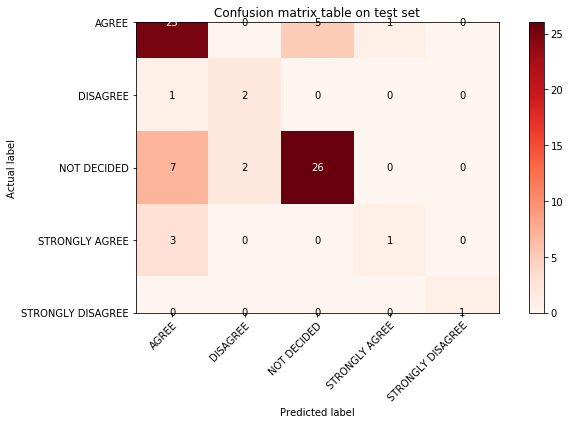

In [66]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Reds):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = list(unique_labels(y_true, y_pred))
    # print(cm)

    fig, ax = plt.subplots(figsize = (10,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Actual label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
# Plot non-normalized confusion matrix
plt.figure(figsize=(9,9))
plot_confusion_matrix(y_test, predictions,classes = class_label,title='Confusion matrix table on test set')  
plt.show()

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                   precision    recall  f1-score   support

            AGREE       0.69      0.81      0.75        31
         DISAGREE       0.50      0.67      0.57         3
      NOT DECIDED       0.84      0.74      0.79        35
   STRONGLY AGREE       0.50      0.25      0.33         4
STRONGLY DISAGREE       1.00      1.00      1.00         1

         accuracy                           0.74        74
        macro avg       0.71      0.69      0.69        74
     weighted avg       0.75      0.74      0.74        74



#### Accuracy is 0.74